# TP 5 : Clustering

# Nom: KAFANDO T Bertrand
# EID2

Le but de ce TP est de créer une fonction Python capable de détecter des clusters de données
homogènes dans un ensemble de données, puis d’analyser un jeu de données réelles.


# A) K-Moyennes :

1. Écrivez en python l’algorithme des K-Moyennes sous la forme d’une fonction.

In [6]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

In [7]:
def kmeans(data,k):
    no_of_iterations = 500
    # initialise randomly k centroids
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx, :] 
    
    # find the distances between centroids and data
    distances = cdist(data,centroids,'euclidean')
    
    # assign the data to nearest centroids
    points_centroids = np.array([np.argmin(i) for i in distances])
    
    #Repeating the above steps for a defined number of iterations
    
    for _ in range (no_of_iterations) :
        centroids = []
        #calculate new centroids
        for idx in range (k) :
            temp_cent = data[points_centroids==idx].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.vstack(centroids) #Updated Centroids
        distances = cdist(data,centroids,'euclidean')
        points_centroids = np.array([np.argmin(i) for i in distances])
        
    
    return points_centroids

In [8]:
iris = datasets.load_iris()
X = iris.data
print(X.shape)
y_pred_me = kmeans(X,3)
y_pred_me

(150, 4)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

Comparez avec la fonction Kmeans de sklearn

In [9]:
# model
kmeans = KMeans(n_clusters=3)
y_pred_sk = kmeans.fit_predict(X)
y_pred_sk

c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

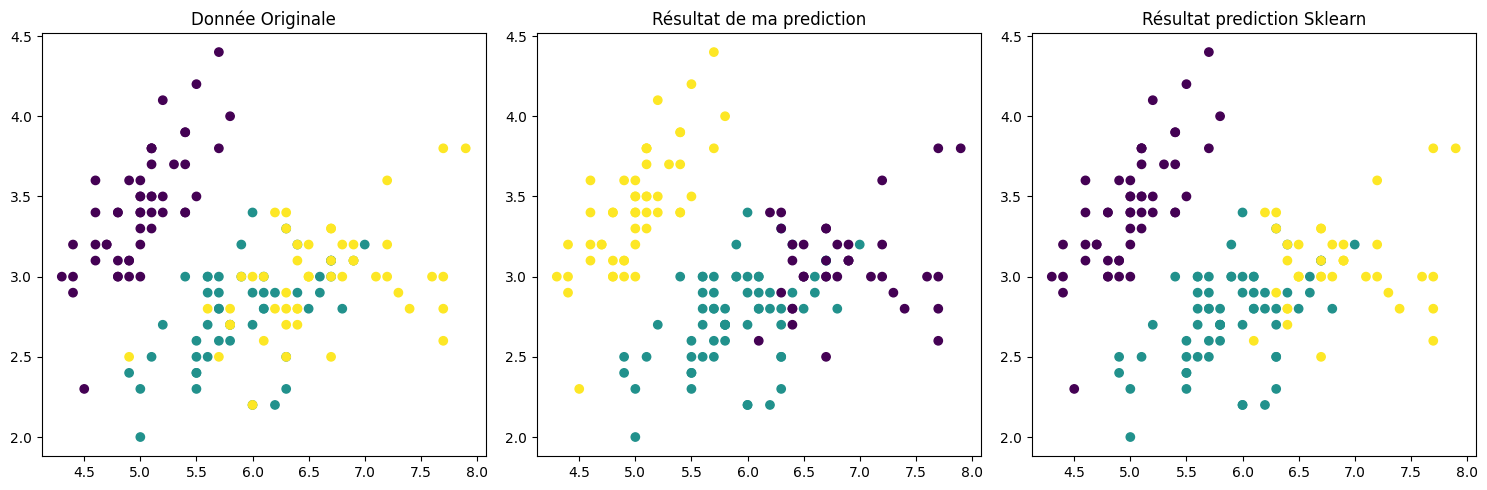

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=iris.target)
axs[0].set_title('Donnée Originale')

axs[1].scatter(X[:, 0], X[:, 1], c=y_pred_me)
axs[1].set_title('Résultat de ma prediction')

axs[2].scatter(X[:, 0], X[:, 1], c=y_pred_sk)
axs[2].set_title('Résultat prediction Sklearn')

plt.tight_layout()  # Ajustement automatique du placement des graphiques
plt.show()

Silhouette Score

In [11]:

print(f"Silhouette Coefficient Ma fonction : {silhouette_score(X, y_pred_me):.3f}")
print(f"Silhouette Coefficient KM sklearn : {silhouette_score(X, y_pred_sk):.3f}")

Silhouette Coefficient Ma fonction : 0.553
Silhouette Coefficient KM sklearn : 0.553


Utilisation du mean square error pour calculer l'arracy de prediction vue que nous les classes dans notre cas

2. Expérimenter l’instabilité due à l’initialisation : les centres des clusters étant choisis au hasard
lors de l’initialisation, le résultat obtenu peut varier d’une exécution à l’autre. 
Ici je vais faire varier un seed pour la genération des centres de classe en ayant un K fixe = 3

In [12]:
def kmeans_with_variable_seed(data,seed,k=3):
    no_of_iterations = 500
    # initialise randomly k centroids
    np.random.seed = seed
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx, :] 
    
    # find the distances between centroids and data
    distances = cdist(data,centroids,'euclidean')
    
    # assign the data to nearest centroids
    points_centroids = np.array([np.argmin(i) for i in distances])
    
    #Repeating the above steps for a defined number of iterations
    
    for _ in range (no_of_iterations) :
        centroids = []
        #calculate new centroids
        for idx in range (k) :
            temp_cent = data[points_centroids==idx].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.vstack(centroids) #Updated Centroids
        distances = cdist(data,centroids,'euclidean')
        points_centroids = np.array([np.argmin(i) for i in distances])
        
    
    return points_centroids,centroids


seeds = [12,85,55,20,85,38,8,50]
final_centroids = []
silhouettes = []
for seed in seeds :
    y_pred,centroids = kmeans_with_variable_seed(X,seed,3)
    final_centroids.append(centroids) 
    silhouettes.append(silhouette_score(X, y_pred))

print(f"silhouettes :{silhouettes}")
final_centroids

silhouettes :[0.5528190123564095, 0.5185675688773279, 0.551191604619592, 0.551191604619592, 0.551191604619592, 0.5528190123564095, 0.551191604619592, 0.551191604619592]


[array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]),
 array([[6.31458333, 2.89583333, 4.97395833, 1.703125  ],
        [4.73181818, 2.92727273, 1.77272727, 0.35      ],
        [5.19375   , 3.63125   , 1.475     , 0.271875  ]]),
 array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615]]),
 array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623]]),
 array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623]]),
 array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
    

On constate que pour chaque seed on a une nouveau coefficient de silhouette et de nouveaux centres

3. Utiliser l’indice de Silhouette (qui est dans le package sklearn) pour stabiliser les résultats et
sélectionner automatiquement le nombre de groupes. Pour ce faire, créez un script qui
applique K-moyenne sur les données pour différents nombres de clusters allant de 2 à 10, 10
fois pour chaque nombre de clusters (soit 90 fois en tout) et qui renvoie la solution ayant le
meilleur score de Silhouette.

In [13]:
def kmeans_k(data,k):
    no_of_iterations = 10
    # initialise randomly k centroids
    np.random.seed = 50
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx, :] 
    
    # find the distances between centroids and data
    distances = cdist(data,centroids,'euclidean')
    
    # assign the data to nearest centroids
    points_centroids = np.array([np.argmin(i) for i in distances])
    
    #Repeating the above steps for a defined number of iterations
    
    for _ in range (no_of_iterations) :
        centroids = []
        #calculate new centroids
        for idx in range (k) :
            temp_cent = data[points_centroids==idx].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.vstack(centroids) #Updated Centroids
        distances = cdist(data,centroids,'euclidean')
        points_centroids = np.array([np.argmin(i) for i in distances])
        
    return points_centroids

nbre_cluters = list(range(2,11,1))
silhouettes = []
for k in nbre_cluters :
    y_pred = kmeans_k(X,k)
    silhouettes.append(silhouette_score(X, y_pred))
valeur_max = max(silhouettes)

# Récupérer l'indice de la valeur maximale
good_k = silhouettes.index(valeur_max) + 2

print("le bon k est :",good_k)
    

print(f"silhouettes :{silhouettes}")

le bon k est : 2
silhouettes :[0.6810461692117462, 0.5528190123564095, 0.4974551890173751, 0.38260806894018873, 0.324486959952685, 0.2727507161182311, 0.33402526313091035, 0.3147968814613238, 0.3342701985573975]


4. Utiliser un ACP (fonction PCA de sklearn) pour vérifier visuellement la cohérence des
groupes obtenus. Vérifier aussi visuellement la séparabilité et la compacité de ces groupes à
l’aide d’une ADL (fonction LinearDiscriminantAnalysis de sklearn). Quelle est la différence
entre les deux méthodes ?

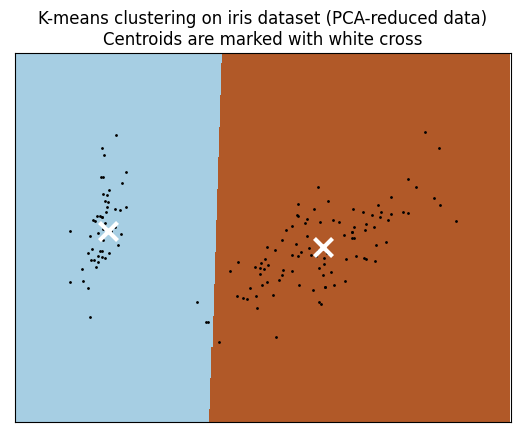

In [14]:
# ACP
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on iris dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

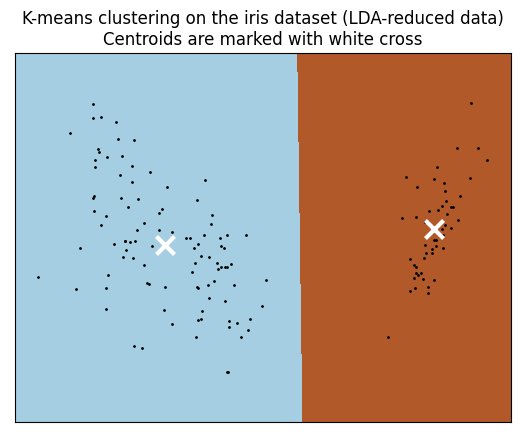

In [15]:
lda = LinearDiscriminantAnalysis(n_components=2)
reduced_data = lda.fit(X, iris.target).transform(X)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the iris dataset (LDA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

quelle est la différence entre les deux méthodes ?

lA Différence majeure est que pour la LDA nous utilisons les labels ce qui n'est pas le cas pour la PCA.

 # B) Analyse des données « choix projet » 

1. Utilisez le package csv (ou l’importation de variable de Spyder) pour lire le fichier et remplir
deux variables : la liste des codes « C » représentant les étudiant (première colonne) et la
matrice « M » des données (tout sauf la première ligne et la première colonne). La matrice M
doit être de type array du package numpy. Faites attentions à ce que les valeurs dans M soient
bien numériques (1, 2, 3) et non textuelle (‘1’, ‘2’, ‘3’). Vous pouvez utiliser la méthode astype
de numpy en cas de besoin.

In [40]:
data = pd.read_csv("choixprojetstab.csv",sep=";")
data

,étudiant·e,ga.vTZVmBFaC.,ga/mLSm4ai/6g,ga04b5zeP48qY,ga1ohIKbe4v9Y,ga2f3zAu/j5w6,ga2tObQKD38MQ,ga5EltwHBOBQU,ga5Go./f4ADBQ,ga5JTmKLpYzns,...,gatfjwrAzu3Fk,gatgLz1yg7ZAg,gavTOkC.twsSQ,gaw2dFU/DFhQo,gawAIBKObOA9Q,gawIG8K0tl6Dg,gaxRM/r6FWnFA,gaxvvLjHn0mEE,gay0.j6cCUFM.,gazuii0BJkiyo
0,bl/.vSDYCGrSs,1,1,1,1,1,3,1,2,2,...,2,1,3,3,1,2,1,1,1,3
1,bl/1NiMubceBs,1,1,1,1,1,3,1,1,1,...,1,1,1,3,2,1,2,1,1,1
2,bl/dvgMTLVSvk,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,bl1NWhKcNADF2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,bl1ao5B7htJfQ,1,1,0,1,0,0,0,0,0,...,2,0,1,0,3,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,blvqKhCDhQab.,1,1,1,1,2,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
67,blwyn40XjgvEs,1,1,1,1,1,1,1,1,1,...,1,2,1,0,1,1,1,1,1,0
68,bly3Oqsvf6WlU,1,1,1,1,1,3,2,0,0,...,1,2,0,2,0,0,1,1,0,2
69,bly69tf4z1FiM,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [42]:
#data = data.rename(columns=data.iloc[0]).drop(data.index[0], axis=0).reset_index(drop=True)

# Éliminer la première ligne
data = data.iloc[1:, 1:]  

# Conversion des données en nombres si nécessaire
data = data.apply(pd.to_numeric)
# Remplacer NaN par 3
data = data.fillna(1)
# Supprimer le header pour obtenir une matrice
matrice_M = data.values

In [43]:
matrice_M

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 0, 2],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]], dtype=int64)

2. Dans sklearn.cluster il existe différents algorithmes de clustering. Testez les différents
algorithmes du package et proposez le meilleur clustering possible des données selon l’indice
Silhouette.

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Données (à remplacer par vos propres données)
# Supposez que vous avez déjà les données dans une variable matrice_M

# Créer une liste pour stocker les scores de silhouette pour chaque algorithme
silhouette_scores = {
    'KMeans': [],
    'AgglomerativeClustering': [],
}

# Boucle sur différentes valeurs de k
for k in range(2, 51):
    # Exemple avec KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans_clusters = kmeans.fit_predict(matrice_M)
    kmeans_silhouette = silhouette_score(matrice_M, kmeans_clusters)
    silhouette_scores['KMeans'].append(kmeans_silhouette)

    # Exemple avec AgglomerativeClustering
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_clusters = agg_clustering.fit_predict(matrice_M)
    agg_silhouette = silhouette_score(matrice_M, agg_clusters)
    silhouette_scores['AgglomerativeClustering'].append(agg_silhouette)

# Recherche du meilleur modèle et du meilleur k pour chaque algorithme
best_scores = {}
best_ks = {}
for algo, scores in silhouette_scores.items():
    best_scores[algo] = max(scores)
    best_ks[algo] = np.argmax(scores) + 2  # +2 car on commence à partir de k=2

# Comparaison des indices de silhouette
print("Meilleurs scores de silhouette pour chaque algorithme:")
for algo, score in best_scores.items():
    best_k = best_ks[algo]
    print(f"{algo}: Meilleur score = {score:.4f} avec k = {best_k}")


c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\

c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\kafan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\

Meilleurs scores de silhouette pour chaque algorithme:
KMeans: Meilleur score = 0.5277 avec k = 46
AgglomerativeClustering: Meilleur score = 0.5305 avec k = 39


Meilleurs scores de silhouette pour chaque algorithme:


KMeans: Meilleur score = 0.5277 avec k = 46


AgglomerativeClustering: Meilleur score = 0.5305 avec k = 39

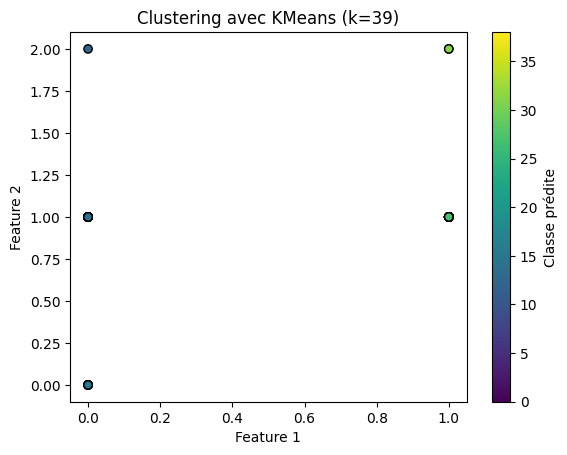

In [74]:
# Supposons que best_k_means soit le meilleur nombre de clusters pour KMeans trouvé précédemment
best_k =39
agg_clustering = AgglomerativeClustering(n_clusters=best_k)
clusters = agg_clustering.fit_predict(matrice_M)

# Visualisation des données en fonction des classes prédites par le meilleur modèle KMeans
plt.scatter(matrice_M[:, 2], matrice_M[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title(f"Clustering avec KMeans (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Classe prédite')
plt.show()
